In [1]:
import numpy as np
import matplotlib.pyplot as plt
from overreact import api

In [2]:
model = api.parse_model("../../data/acetate/model.k")
k = api.get_k(model.scheme, model.compounds)
model.scheme.compounds

assuming zero rotational energy for atomic system
assuming zero vibrational energy for atomic system
assuming zero rotational entropy for atomic system
assuming zero vibrational entropy for atomic system


('AcOH(aq)', 'AcO-(aq)', 'H+(aq)', 'AcOH(g)', 'AcO-(g)')

In [3]:
Y = []
pHs = np.linspace(0, 14)
for pH in pHs:
    scheme, kobs = api.get_fixed_scheme(model.scheme, k, {"H+(aq)": 10**-pH})
    dydt = api.get_dydt(scheme, kobs)
    y, _ = api.get_y(dydt, [0.5, 0.0, 0.0, 0.0])
    Y.append(y(y.t_max))
Y = np.asarray(Y)

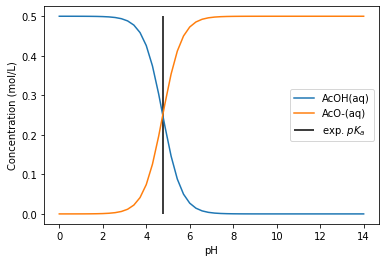

In [4]:
for i, compound in enumerate(scheme.compounds):
    if "(aq)" in compound:
        plt.plot(pHs, Y[:, i], label=compound)

plt.vlines(4.756, 0.0, 0.5, label=r"exp. $pK_a$", color="k")
plt.xlabel("pH")
plt.ylabel("Concentration (mol/L)")
plt.legend()